In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction-dataset/car_prediction_data.csv


In [ ]:
df = pd.read_csv('/kaggle/input/car-price-prediction-dataset/car_prediction_data.csv')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


Manual is the most frequent transmission type; 261 entries.
Petrol is the most common Fuel type;239 entries.

In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.duplicated().sum()

2

In [ ]:
df[df.duplicated(keep=False)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
15,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
numerical = df.select_dtypes(exclude='object')

Text(0.5, 1.0, 'Correlations')

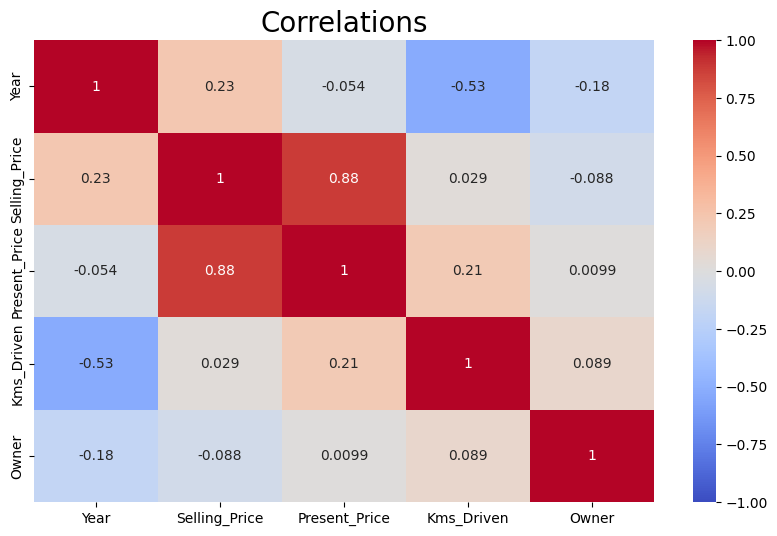

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(numerical.corr(),cmap='coolwarm',vmin=-1,vmax=1,center=0,annot=True)
plt.title('Correlations',fontsize=20)

Creating a model to predict present price.

In [ ]:
df.columns=map(str.lower,df.columns)

Text(0.5, 1.0, 'Transmission type has influence on Present Price')

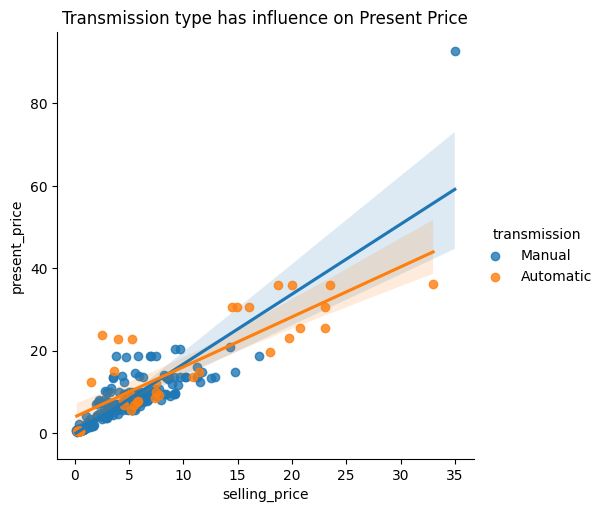

In [ ]:
sns.lmplot(x='selling_price',y='present_price',hue='transmission',data=df)
plt.title('Transmission type has influence on Present Price')

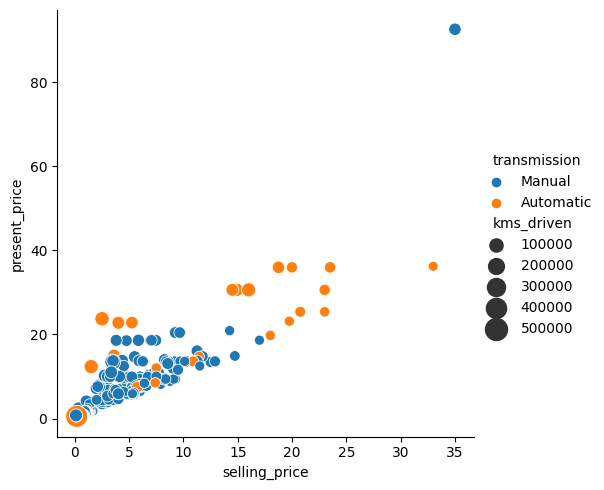

In [ ]:
sns.relplot(x='selling_price',y='present_price',hue='transmission',data=df, size='kms_driven', sizes=(50,250))


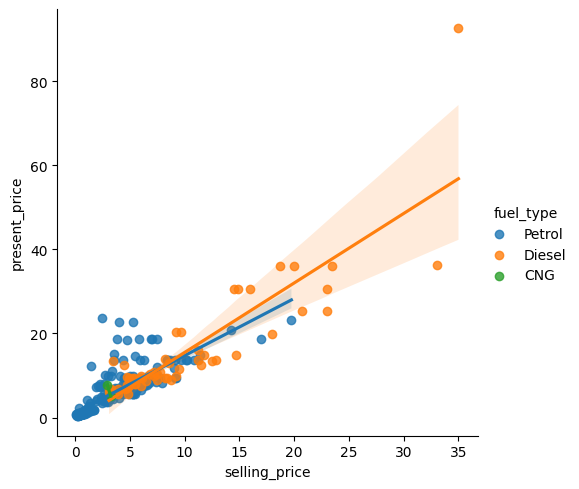

In [ ]:
sns.lmplot(x='selling_price',y='present_price',hue='fuel_type',data=df)
plt.title('Fuel type has influence on Present Price')

In [ ]:
import statsmodels.api as sm
model1 = sm.OLS.from_formula('present_price~selling_price+transmission',df).fit()
model1.params

Intercept                 1.433449
transmission[T.Manual]   -0.824847
selling_price             1.487014
dtype: float64

In [ ]:
model1.llf

-846.9747196715863

In [ ]:
model1.rsquared

0.7689650932006519

this model can account for 76.8% of the variation in Present price; it is 76% accurate.

In [ ]:
model2 = sm.OLS.from_formula('present_price~selling_price',df).fit()
model2.rsquared_adj

0.7672577000576921

In [ ]:
model1.rsquared_adj

0.7674040465330887

In [ ]:
from statsmodels.stats.anova import anova_lm
results = anova_lm(model1,model2)

In [ ]:
results

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,296.0,5054.070551,0.0,NaN,NaN,NaN
1,297.0,5074.335815,-1.0,-20.265264,1.186122,NaN


In [ ]:
model1.bic

1711.0507700633445

In [ ]:
model2.bic

1706.5468270642473

In [ ]:
model1.aic

1699.9494393431726

In [ ]:
model2.aic

1699.145939917466

Aic and Bic functions point to Model 2 being better.